<a href="https://colab.research.google.com/github/ADERGRAM/2024_Accident_Project/blob/main/car_accident_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 나눔고딕 폰트 설치
!apt-get install fonts-nanum -qq > /dev/null
# 폰트 경로 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# 폰트 매니저에 폰트 등록
fm.fontManager.addfont(path)
# 폰트 설정
plt.rc('font', family='NanumGothic')
# 마이너스 기호 깨짐 현상 해결
plt.rc('axes', unicode_minus=False)

In [ ]:
# df1820 = df18.drop(['Unnamed: 0'], axis=1)
# df2123 = df20.drop(['Unnamed: 0'], axis=1)

import pandas as pd
from google.colab import drive

drive.mount('/gdrive', force_remount=True)

df1820 = "/gdrive/MyDrive/Project/accidentInfoList_18-20.csv"
df2123 = "/gdrive/MyDrive/Project/accidentInfoList_21-23.csv"

df18 = pd.read_csv(df1820, encoding='cp949')
df21 = pd.read_csv(df2123, encoding='cp949')

df = pd.concat([df18, df21])
df.rename(columns={'부상신고자수':'부상자수'}, inplace = True) # 칼럼명 : 부상신고자수 -> 부상자수 변경
df = df.drop(['사고번호'], axis=1) # 사고번호 열 제거
df

Mounted at /gdrive


,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상자수,사고유형,법규위반,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2018년 1월 1일 01시,월요일,경기도 수원시 권선구 오목천동,중상사고,0,1,0,0,차대차 - 기타,안전거리미확보,...,맑음,단일로 - 기타,승용,남,39세,상해없음,승용,남,25세,중상
1,2018년 1월 1일 07시,월요일,경기도 수원시 팔달구 남창동,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,...,맑음,단일로 - 기타,승합,남,44세,상해없음,보행자,여,30세,경상
2,2018년 1월 1일 09시,월요일,경기도 수원시 권선구 서둔동,경상사고,0,0,1,0,차대차 - 추돌,안전운전불이행,...,맑음,교차로 - 교차로부근,승합,남,53세,상해없음,승용,여,71세,경상
3,2018년 1월 1일 14시,월요일,경기도 수원시 장안구 율전동,부상신고사고,0,0,0,1,차대차 - 기타,신호위반,...,맑음,교차로 - 교차로안,승합,남,52세,상해없음,이륜,남,20세,부상신고
4,2018년 1월 1일 15시,월요일,경기도 수원시 팔달구 인계동,경상사고,0,0,4,0,차대차 - 추돌,안전운전불이행,...,맑음,교차로 - 교차로부근,승용,남,30세,상해없음,승용,남,73세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14059,2023년 12월 31일 06시,일요일,경기도 수원시 팔달구 인계동,중상사고,0,1,0,0,차대사람 - 횡단중,안전운전불이행,...,비,단일로 - 기타,승용,남,80세,상해없음,보행자,남,65세,중상
14060,2023년 12월 31일 13시,일요일,경기도 수원시 영통구 원천동,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,...,맑음,교차로 - 교차로부근,승용,여,46세,상해없음,승용,남,36세,경상
14061,2023년 12월 31일 13시,일요일,경기도 수원시 영통구 영통동,경상사고,0,0,1,0,차대차 - 측면충돌,교차로운행방법위반,...,맑음,교차로 - 교차로안,승용,여,47세,상해없음,승용,남,68세,경상
14062,2023년 12월 31일 21시,일요일,경기도 수원시 권선구 오목천동,중상사고,0,1,3,0,차대차 - 기타,안전운전불이행,...,맑음,단일로 - 기타,승용,남,52세,상해없음,화물,남,50세,기타불명


In [ ]:
# 파일 결합
df.to_csv('/gdrive/MyDrive/Project/accidentInfoList_18-23.csv', encoding='cp949', index=False)

In [ ]:
df['ECLO'] = (df['사망자수'] * 10) + (df['중상자수'] * 5) + (df['경상자수'] * 3) + (df['부상자수'] * 1)
df = df.dropna() # 결측치 제거

df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')  ## 2023-01-01 00:00:00
df['사고유형'] = df['사고유형'].str.split(' - ').str[0] # 사고유형 '-'를 기준으로 분리
df['시간'] = df['사고일시'].dt.hour  # 시간 칼럼 생성
df['주야간'] = df['시간'].apply(lambda x: '주간' if 7 <= x <= 20 else '야간') # 주간 : 07~20 야간 : else
df['시군구'] = df['시군구'].apply(lambda x: x.replace('경기도 수원시 ', '')) # 시군구 열에 경기도 수원시 제거

df.head()

<ipython-input-20-8648ce9e4ffa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')  ## 2023-01-01 00:00:00
<ipython-input-20-8648ce9e4ffa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['사고유형'] = df['사고유형'].str.split(' - ').str[0] # 사고유형 '-'를 기준으로 분리
<ipython-input-20-8648ce9e4ffa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상자수,사고유형,법규위반,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,ECLO,시간,주야간
0,2018-01-01 01:00:00,월요일,권선구 오목천동,중상사고,0,1,0,0,차대차,안전거리미확보,...,남,39세,상해없음,승용,남,25세,중상,5,1,야간
1,2018-01-01 07:00:00,월요일,팔달구 남창동,경상사고,0,0,1,0,차대사람,안전운전불이행,...,남,44세,상해없음,보행자,여,30세,경상,3,7,주간
2,2018-01-01 09:00:00,월요일,권선구 서둔동,경상사고,0,0,1,0,차대차,안전운전불이행,...,남,53세,상해없음,승용,여,71세,경상,3,9,주간
3,2018-01-01 14:00:00,월요일,장안구 율전동,부상신고사고,0,0,0,1,차대차,신호위반,...,남,52세,상해없음,이륜,남,20세,부상신고,1,14,주간
4,2018-01-01 15:00:00,월요일,팔달구 인계동,경상사고,0,0,4,0,차대차,안전운전불이행,...,남,30세,상해없음,승용,남,73세,경상,12,15,주간


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 27614 entries, 0 to 14063
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사고일시        27614 non-null  datetime64[ns]
 1   요일          27614 non-null  object        
 2   시군구         27614 non-null  object        
 3   사고내용        27614 non-null  object        
 4   사망자수        27614 non-null  int64         
 5   중상자수        27614 non-null  int64         
 6   경상자수        27614 non-null  int64         
 7   부상자수        27614 non-null  int64         
 8   사고유형        27614 non-null  object        
 9   법규위반        27614 non-null  object        
 10  노면상태        27614 non-null  object        
 11  기상상태        27614 non-null  object        
 12  도로형태        27614 non-null  object        
 13  가해운전자 차종    27614 non-null  object        
 14  가해운전자 성별    27614 non-null  object        
 15  가해운전자 연령    27614 non-null  object        
 16  가해운전자 상해정도  27614 non-null 

,사고일시,사망자수,중상자수,경상자수,부상자수,ECLO,시간
count,27614,27614.000000,27614.000000,27614.000000,27614.000000,27614.000000,27614.000000
mean,2020-12-22 20:35:12.754399744,0.005686,0.232998,1.092598,0.109473,4.609111,13.858985
min,2018-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2019-06-15 16:30:00,0.000000,0.000000,1.000000,0.000000,3.000000,10.000000
50%,2020-12-14 14:30:00,0.000000,0.000000,1.000000,0.000000,3.000000,15.000000
75%,2022-07-06 21:00:00,0.000000,0.000000,1.000000,0.000000,5.000000,19.000000
max,2023-12-31 23:00:00,2.000000,13.000000,22.000000,12.000000,96.000000,23.000000
std,NaN,0.075669,0.482290,0.991475,0.394070,3.229636,5.959687


In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [ ]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import sys
import tqdm as tq
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
import matplotlib
import seaborn as sns
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("-------------------------- Python & library version --------------------------")
print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("tqdm version: {}".format(tq.__version__))
print("xgboost version: {}".format(xgb.__version__))
print("lightgbm version: {}".format(lgb.__version__))
print("catboost version: {}".format(cat.__version__))
print("seaborn version: {}".format(sns.__version__))
print("scikit-learn version: {}".format(skl.__version__))
print("------------------------------------------------------------------------------")

# +요인 : 사고유형, 사고내용, 법규위반, 주야간, 가해운전자 연령, 가해운전자 상해정도, 피해운전자 상해정도 /  -요인 : 요일, 시군구, 노면상태, 기상상태, 피해운전자 차종, 도로형태, 피해운전자 연령
X = df[['사고내용', '사망자수', '중상자수', '경상자수', '부상자수', '사고유형', '법규위반',
        '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
        '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '주야간']] # 독립변수 X
y = df[['ECLO']] # 종속 변수 y

# train, test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("훈련 데이터 ->", X_train.shape)
print("검증 데이터 ->", X_test.shape)

# Train data CSV 파일 저장
X_train.to_csv("/gdrive/MyDrive/Project/train_X.csv", index=False)
y_train.to_csv("/gdrive/MyDrive/Project/train_y.csv", index=False)

# Test data CSV 파일 저장
X_test.to_csv("/gdrive/MyDrive/Project/test_X.csv", index=False)
y_test.to_csv("/gdrive/MyDrive/Project/test_y.csv", index=False)

-------------------------- Python & library version --------------------------
Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
pandas version: 2.0.3
numpy version: 1.25.2
matplotlib version: 3.7.1
tqdm version: 4.66.4
xgboost version: 2.0.3
lightgbm version: 4.1.0
catboost version: 1.2.5
seaborn version: 0.13.1
scikit-learn version: 1.2.2
------------------------------------------------------------------------------
훈련 데이터 -> (22091, 19)
검증 데이터 -> (5523, 19)


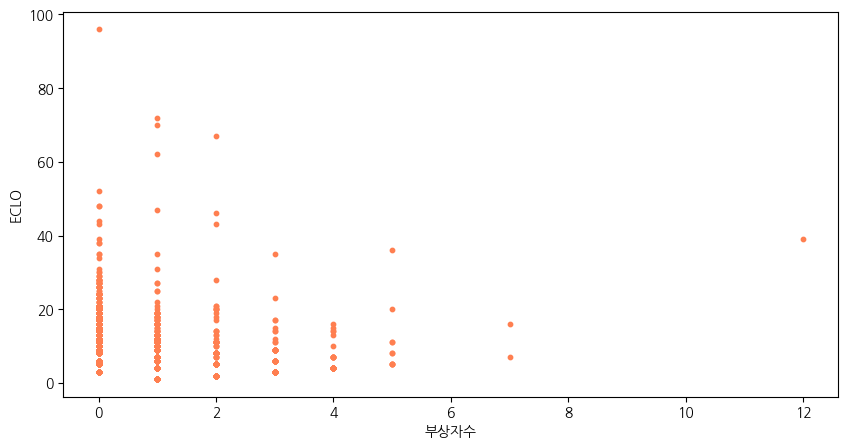

In [ ]:
# Matplotlib으로 산점도 그래프 그리기
# 독립변수 '부상자수' 지정, 변경 가능
df.plot(kind= 'scatter', x = '부상자수', y = 'ECLO', c='coral', s=10, figsize=(10, 5))
plt.show()

In [ ]:
df['사고일시'] = df['사고일시'].astype(str)

features = ['사고내용', '사망자수', '중상자수', '경상자수', '부상자수', '사고유형', '법규위반',
        '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
        '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '주야간']
X_pred = df[features]

# 모델 학습
model = CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1)
model.fit(X, y, verbose=1,cat_features=X.columns.tolist())

# 모델 예측
y_pred = model.predict(X_pred)

<ipython-input-31-e8f934a1eaff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['사고일시'] = df['사고일시'].astype(str)


0:	learn: 2.9675481	total: 89.6ms	remaining: 8.88s
1:	learn: 2.7447509	total: 152ms	remaining: 7.46s
2:	learn: 2.5467051	total: 217ms	remaining: 7.03s
3:	learn: 2.3658660	total: 264ms	remaining: 6.33s
4:	learn: 2.1896470	total: 348ms	remaining: 6.61s
5:	learn: 2.0407613	total: 396ms	remaining: 6.2s
6:	learn: 1.9035740	total: 434ms	remaining: 5.76s
7:	learn: 1.7847845	total: 487ms	remaining: 5.61s
8:	learn: 1.6836534	total: 545ms	remaining: 5.51s
9:	learn: 1.5836329	total: 609ms	remaining: 5.48s
10:	learn: 1.4882380	total: 657ms	remaining: 5.32s
11:	learn: 1.4072899	total: 708ms	remaining: 5.19s
12:	learn: 1.3396919	total: 788ms	remaining: 5.28s
13:	learn: 1.2771814	total: 844ms	remaining: 5.18s
14:	learn: 1.2171885	total: 922ms	remaining: 5.22s
15:	learn: 1.1666145	total: 1.03s	remaining: 5.42s
16:	learn: 1.1180570	total: 1.1s	remaining: 5.36s
17:	learn: 1.0724125	total: 1.15s	remaining: 5.22s
18:	learn: 1.0375624	total: 1.18s	remaining: 5.04s
19:	learn: 0.9998378	total: 1.22s	remainin

In [ ]:
# 모델 평가
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_true=y_pred, y_pred=y)
rmse = np.sqrt(mse)
r2 = r2_score(y_true=y_pred, y_pred=y)
mae = mean_absolute_error(y_true=y_pred, y_pred=y)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)
print("MAE:", mae)

MSE: 0.5349084273199873
R2: 0.9390022059125478


In [ ]:
from sklearn.metrics import confusion_matrix

# 예측값 이진화
y_pred_cat = model.predict(X_test)
y_pred_bin = [1 if pred >= 3 else 0 for pred in y_pred_cat]
y_test_bin = [1 if true >= 3 else 0 for true in y_test['ECLO']]

confusion_matrix = confusion_matrix(y_test_bin, y_pred_bin)

print(f"혼동 행렬:\n{confusion_matrix}")

# 지표 계산
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) / len(y_test_bin)
precision = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1])
recall = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"정확도: {accuracy:.4f}")
print(f"정밀도: {precision:.4f}")
print(f"재현율: {recall:.4f}")
print(f"F1 스코어: {f1_score:.4f}")


In [ ]:
# 데이터 준비
features = ['사고내용', '사망자수', '중상자수', '경상자수', '부상자수', '사고유형', '법규위반',
            '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령',
            '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '주야간']
X = df[features]
y = df['ECLO']  # 예측 타겟 변수 ECLO

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 하이퍼파라미터 그리드 설정
# 오래 걸려서 출력 안됨
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# CatBoost Regressor 모델 생성
model = CatBoostRegressor(cat_features=features, verbose=0)

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)


In [ ]:
# 최적 하이퍼파라미터를 사용하여 모델 학습
# 오래 걸려서 출력 안됨
best_params = grid_search.best_params_
model = CatBoostRegressor(**best_params, cat_features=features, verbose=1)
model.fit(X_train, y_train)

# 예측
X_pred = df[features]
y_pred = model.predict(X_pred)


In [ ]:
dffnl = "/gdrive/MyDrive/Project/accidentInfoList_18-23.csv"

sample_submission = pd.read_csv(dffnl, encoding='cp949')
sample_submission.head()
baseline_submission = sample_submission.copy()
baseline_submission['ECLO'] = y_pred
baseline_submission

,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상자수,사고유형,법규위반,...,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,ECLO,시간,주야간
0,2018-01-01 01:00:00,월요일,권선구 오목천동,중상사고,0,1,0,0,차대차,안전거리미확보,...,남,39세,상해없음,승용,남,25세,중상,5.059520,1,야간
1,2018-01-01 07:00:00,월요일,팔달구 남창동,경상사고,0,0,1,0,차대사람,안전운전불이행,...,남,44세,상해없음,보행자,여,30세,경상,3.017030,7,주간
2,2018-01-01 09:00:00,월요일,권선구 서둔동,경상사고,0,0,1,0,차대차,안전운전불이행,...,남,53세,상해없음,승용,여,71세,경상,3.019154,9,주간
3,2018-01-01 14:00:00,월요일,장안구 율전동,부상신고사고,0,0,0,1,차대차,신호위반,...,남,52세,상해없음,이륜,남,20세,부상신고,1.130371,14,주간
4,2018-01-01 15:00:00,월요일,팔달구 인계동,경상사고,0,0,4,0,차대차,안전운전불이행,...,남,30세,상해없음,승용,남,73세,경상,13.311949,15,주간
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27609,2023-12-31 06:00:00,일요일,팔달구 인계동,중상사고,0,1,0,0,차대사람,안전운전불이행,...,남,80세,상해없음,보행자,남,65세,중상,5.054190,6,야간
27610,2023-12-31 13:00:00,일요일,영통구 원천동,경상사고,0,0,2,0,차대차,안전운전불이행,...,여,46세,상해없음,승용,남,36세,경상,6.037261,13,주간
27611,2023-12-31 13:00:00,일요일,영통구 영통동,경상사고,0,0,1,0,차대차,교차로운행방법위반,...,여,47세,상해없음,승용,남,68세,경상,3.019154,13,주간
27612,2023-12-31 21:00:00,일요일,권선구 오목천동,중상사고,0,1,3,0,차대차,안전운전불이행,...,남,52세,상해없음,화물,남,50세,기타불명,13.873664,21,야간
